In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [60]:
#Constant
G = 6.67430 * 10**-11

#Initial pars: mass = 10^21 kg, radius = km
mass_sun = 1989100000.
radius_sun = 695700.

mass_mercury = 330.11
radius_mercury = 57 * 10**6.

mass_venus = 4867.5
radius_venus = 108 * 10**6.

mass_earth = 5972.4
radius_earth = 150 * 10**6.

mass_mars = 641.71
radius_mars = 228 * 10**6.

mass_jupiter = 1898187
radius_jupiter = 779 * 10**6.

mass_saturn = 568317
radius_saturn = 1.43 * 10**9.

mass_uranus = 86813
radius_uranus = 2.88 * 10**9.

mass_neptune = 102413
radius_neptune = 4.50 * 10**9.

mass_pluto = 13.03
radius_pluto = 5.91 * 10**9.

planet_masses = [
    mass_sun,
    mass_mercury,
    mass_venus,
    mass_earth,
    mass_mars,
    mass_jupiter,
    mass_saturn,
    mass_uranus,
    mass_neptune,
    mass_pluto
]

planet_radii = [
    radius_sun,
    radius_mercury,
    radius_venus,
    radius_earth,
    radius_mars,
    radius_jupiter,
    radius_saturn,
    radius_uranus,
    radius_neptune,
    radius_pluto
]

planet_names = [
    "Sun",
    "Mercury",
    "Venus",
    "Earth",
    "Mars",
    "Jupiter",
    "Saturn",
    "Uranus",
    "Neptune",
    "Pluto"
]

In [61]:
class body():
    def __init__(self, mass, x_pos, y_pos, name, radius):
        self.mass = mass * 10**21
        self.x_pos = x_pos * 10**3
        self.y_pos = y_pos * 10**3
        self.radius = radius
        self.x_velocity = np.sqrt(G * mass_sun/radius)# They start as circular
        self.y_velocity = 0
        self.name = name

In [62]:
system_bodies = [body(planet_masses[body_index], planet_radii[body_index], 0, planet_names[body_index], planet_radii[body_index]) for body_index in range(len(planet_masses))]

In [69]:
def radii_matrix(system_bodies): # Replace with the (n^2 + n)/2 operations
    radii = {}
    for body_a in system_bodies:
        radii[body_a.name] = {}
        for body_b in system_bodies:
            distance = np.sqrt((body_a.x_pos - body_b.x_pos)**2 + (body_a.y_pos - body_b.y_pos)**2)
            radii[body_a.name][body_b.name] = distance

    return radii

In [35]:
def evolve_position(body_a, body_b, dt, radii):

    F = np.array([0,0])
    for secondary in planet_names:
        #Force vector is sum of individual forces
        F_i = np.sqrt(G * body_a.mass + body_b.mass)/radii[body_b.name][body_a.name]
        f_vec = np.array(body_a.x_pos - body_b.x_pos, body_a.y_pos - body_b.y_pos)
        f_vec = F_i * f_vec/np.sqrt(f_vec[0]**2 + f_vec[1]**2)
        #Force components
        F = F + np.array([np.dot(f_vec, np.array([1, 0])),
                      np.dot(f_vec, np.array([0, 1]))])
    
    #Velocity Change
    body_a.x_velocity = body_a.x_velocity + F[0] * dt
    body_a.y_velocity = body_a.x_velocity + F[1] * dt

    body_a.x_pos = body_a.x_pos +  body_a.x_velocity * dt
    body_a.x_pos = body_a.y_pos +  body_a.y_velocity * dt
    return body_a

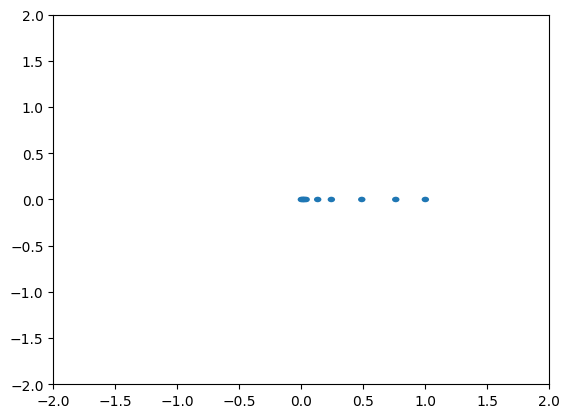

In [83]:
fig, ax = plt.subplots()
for planet in system_bodies:
    ax.add_patch(plt.Circle((planet.x_pos/(radius_pluto*10**3), planet.y_pos/(radius_pluto*10**3)), radius=0.03))
plt.xlim([-2,2])
plt.ylim([-2,2])
fig.savefig('plotcircles.png')